In [88]:
pip install ydata_profiling

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer #Tool for basic imputation (mean, median, mode) of missing values.
from sklearn.ensemble import IsolationForest # Anomaly detection algorithm for identifying outliers in high-dimensional data.
from scipy import stats # Statistical functions, including Z-score calculations for outlier detection.
from ydata_profiling import ProfileReport # Generates detailed EDA reports with data summaries and visualizations.

In [90]:
# Set random seed
np.random.seed(42)

# 1. Generate Synthetic Data
n_samples = 1000
data = {
    'age': np.random.normal(40, 10, n_samples),
    'income': np.random.lognormal(10, 0.5, n_samples),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples, p=[0.4, 0.3, 0.2, 0.1]),
    'employment': np.random.choice(['Full-time', 'Part-time', 'Unemployed'], n_samples, p=[0.6, 0.3, 0.1])
}
df = pd.DataFrame(data)
df.head()

,age,income,education,employment
0,44.967142,44341.562353,Bachelor,Full-time
1,38.617357,34972.483357,High School,Full-time
2,46.476885,22693.077136,High School,Part-time
3,55.230299,15939.117886,High School,Full-time
4,37.658466,31229.288168,Master,Full-time


In [91]:
# Introduce missing values
df.loc[np.random.choice(df.index, 100), 'age'] = np.nan
df.loc[np.random.choice(df.index, 100), 'income'] = np.nan
df.loc[np.random.choice(df.index, 50), 'education'] = np.nan
df.loc[np.random.choice(df.index, 50), 'employment'] = np.nan

# Introduce outliers in income
df.loc[np.random.choice(df.index, 20), 'income'] *= 10

***Data exploration***

In [92]:
#Data exploration
#Check for the general information in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         906 non-null    float64
 1   income      905 non-null    float64
 2   education   950 non-null    object 
 3   employment  951 non-null    object 
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


In this given dataset,there are 1000 entries(rows)
There are 3 columns and 2 are numerical with float data types and 2 categorical with (object data types)
The memory usage is 31.4kb


In [93]:
#Check the data description of all the columns in the data
df.describe(include='all')

,age,income,education,employment
count,906.000000,905.000000,950,951
unique,NaN,NaN,4,3
top,NaN,NaN,High School,Full-time
freq,NaN,NaN,387,609
mean,40.247447,30828.025009,NaN,NaN
std,9.804542,39648.200065,NaN,NaN
min,7.587327,5063.461821,NaN,NaN
25%,33.735701,16299.569409,NaN,NaN
50%,40.404177,22786.596181,NaN,NaN
75%,46.580466,32506.018575,NaN,NaN


The average age is 40 years
The oldest person in 78
The youngest person is 7
The top mode of employemnt is full time
The highest instances of education is high school

In [94]:
#Check for missing values
df.isnull().sum()

,0
age,94
income,95
education,50
employment,49


-There are 94 missing values in the Age column
-There are 95 mssing values in the income column
-There are 50 missing values in the education column
-There are 49 missing values in the employment column

In [95]:
#Generating a pandas profiling report
profile = ProfileReport(df, title="Pandas Profiling Report",explorative=True)
profile.to_file("pandas_profiling_report.html")
print("\nPandas Profiling Report generated and saved as 'pandas_profiling_report.html'")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 45.85it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


Pandas Profiling Report generated and saved as 'pandas_profiling_report.html'


***Handling missing values with imputation part 1***

In [96]:
#Imputation methods
mode_imputer = SimpleImputer(strategy='most_frequent')
df['age'] = mode_imputer.fit_transform(df[['age']])
print('\nMode Imputed Age')
print(df['age'])


Mode Imputed Age
0      44.967142
1      38.617357
2      46.476885
3      55.230299
4      37.658466
         ...    
995    37.188997
996    57.976865
997    46.408429
998    34.288210
999    45.725828
Name: age, Length: 1000, dtype: float64


I used mode for imputation because the number of values are enormoues so highest occuring will present a more natuarl representation

In [97]:
#Imputation methods
mode_imputer = SimpleImputer(strategy='most_frequent')
df['income'] = mode_imputer.fit_transform(df[['income']])
print('\nMode Imputed income')
print(df['income'])


Mode Imputed income
0      44341.562353
1      34972.483357
2      22693.077136
3      15939.117886
4      31229.288168
           ...     
995    37611.875571
996    21736.309072
997    14172.555672
998    20301.834249
999    15177.186293
Name: income, Length: 1000, dtype: float64


I used mode for imputation because the number of values are enormoues so highest occuring will present a more natuarl representation

In [98]:
#Mode Inputation(Categorical -Education,Employment)
mode_imputer = SimpleImputer(strategy='most_frequent')
df['education'] = mode_imputer.fit_transform(df[['education']]).ravel()
df['employment'] = mode_imputer.fit_transform(df[['employment']]).ravel()
print('\nMode Imputed education')
print(df['education'])


Mode Imputed education
0      High School
1      High School
2      High School
3      High School
4           Master
          ...     
995    High School
996         Master
997    High School
998    High School
999       Bachelor
Name: education, Length: 1000, dtype: object


I used mode for imputation because the number of values are enormous so highest occuring will present a more natuarl representation

In [99]:
df.head(10)

,age,income,education,employment
0,44.967142,44341.562353,High School,Full-time
1,38.617357,34972.483357,High School,Full-time
2,46.476885,22693.077136,High School,Part-time
3,55.230299,15939.117886,High School,Full-time
4,37.658466,31229.288168,Master,Full-time
5,37.658630,26815.696697,PhD,Full-time
6,55.792128,5063.461821,High School,Full-time
7,7.587327,30260.118423,PhD,Part-time
8,35.305256,37226.507647,Bachelor,Full-time
9,45.425600,16854.658969,High School,Full-time


In [100]:
#Confirm that all missing values have been dealt with
df.isnull().sum()

,0
age,0
income,0
education,0
employment,0


***Handling missing values part 2 with backward and forward fill***

In [101]:
# Set random seed
np.random.seed(8)

# 1. Generate Synthetic Data
n_samples = 1000
data = {
    'age': np.random.normal(40, 10, n_samples),
    'income': np.random.lognormal(10, 0.5, n_samples),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples, p=[0.4, 0.3, 0.2, 0.1]),
    'employment': np.random.choice(['Full-time', 'Part-time', 'Unemployed'], n_samples, p=[0.6, 0.3, 0.1])
}
df = pd.DataFrame(data)
df.head()

,age,income,education,employment
0,40.912047,12567.938216,PhD,Part-time
1,50.912827,19355.947903,Bachelor,Full-time
2,20.530297,25774.942685,High School,Full-time
3,26.136505,24130.623657,Bachelor,Part-time
4,17.035084,34207.513831,Master,Part-time


In [102]:
# Introduce missing values
df.loc[np.random.choice(df.index, 100), 'age'] = np.nan
df.loc[np.random.choice(df.index, 100), 'income'] = np.nan
df.loc[np.random.choice(df.index, 50), 'education'] = np.nan
df.loc[np.random.choice(df.index, 50), 'employment'] = np.nan

# Introduce outliers in income
df.loc[np.random.choice(df.index, 20), 'income'] *= 10

In [103]:
#Check for missing values
df.isnull().sum()

,0
age,93
income,95
education,47
employment,49


In [104]:
#Fill in missing data with forward fill
#Forward fill
df['age'] = df['age'].fillna(method='ffill')
df['income']=df['income'].fillna(method='ffill')
print("\nForward Fill Age")
print(df[['age']].head())
print("\nForward Fill Income:")
print(df[['income']].head())


Forward Fill Age
         age
0  40.912047
1  50.912827
2  50.912827
3  26.136505
4  17.035084

Forward Fill Income:
         income
0  12567.938216
1  19355.947903
2  25774.942685
3  24130.623657
4  34207.513831


<ipython-input-104-3848518627>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['age'] = df['age'].fillna(method='ffill')
<ipython-input-104-3848518627>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['income']=df['income'].fillna(method='ffill')


In [105]:
df.isnull().sum()

,0
age,0
income,0
education,47
employment,49


In [106]:
#Apply backward fill to education and employment columns

df['education'] = df['education'].fillna(method='bfill')
df['employment'] = df['employment'].fillna(method='bfill')
print("\nBackward Fill Education:")
print(df[['education']].head())
print("\nBackward Fill Employment:")
print(df[['employment']].head())


Backward Fill Education:
     education
0          PhD
1     Bachelor
2  High School
3     Bachelor
4       Master

Backward Fill Employment:
  employment
0  Part-time
1  Full-time
2  Full-time
3  Part-time
4  Part-time


<ipython-input-106-364059218>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['education'] = df['education'].fillna(method='bfill')
<ipython-input-106-364059218>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['employment'] = df['employment'].fillna(method='bfill')


In [107]:
#Recheck for missing values
df.isnull().sum()

,0
age,0
income,0
education,0
employment,0


In [108]:
# KNN Imputation(Numerical)
# knn_imputer=KNNImputer(n_neighbors=5)
# df[['age_knn','income_knn']]=knn_imputer.fit_transform(df[['age','income']])
# print("\nKNN Imputed Age")
# print(df[['age']].head())
# print("\nKNN Imputed Income")
# print(df[['income']].head())

***Dealing with outliers****

In [116]:
#Check the shape of the data
df.shape

(1000, 4)

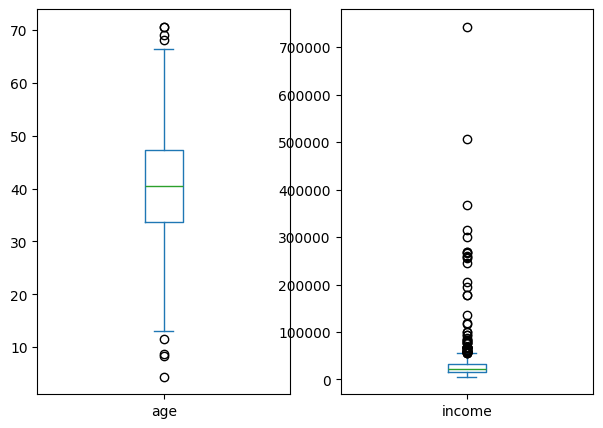

In [109]:
#Plot box plots to check for outliers
df.plot(kind='box',subplots=True,layout=(1,4),figsize=(15,5))
plt.show()

In [111]:
#Dealing with outliers using z-score
z_scores = np.abs(stats.zscore(df['age'].dropna()))
outliers_z= df['age'][z_scores >3]
print("\nAge Outliers (Z-score):")
print(outliers_z)


Age Outliers (Z-score):
48     8.650802
552    4.405403
839    8.290602
Name: age, dtype: float64


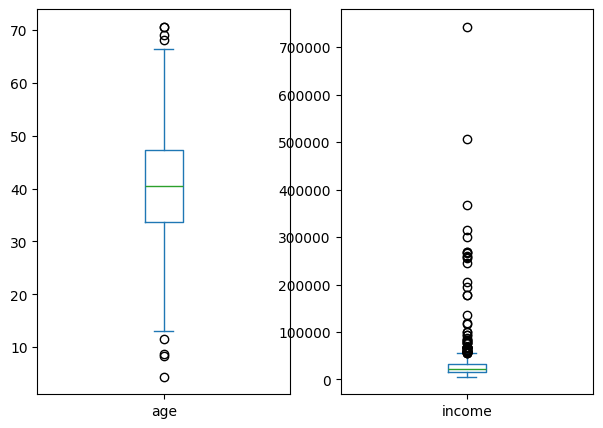

In [113]:
#Plot box plots after dealing with outliers
df.plot(kind='box',subplots=True,layout=(1,4),figsize=(15,5))
plt.show()

In [118]:
#Deal with outliers using IQR(Inter quartile range) on (Income) column
Q1=df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR=Q3-Q1
outliers_iqr = df['income'][(df['income'] < Q1 - 1.5 * IQR) | (df['income'] > Q3 + 1.5 * IQR)]
print("\nIncome Outliers (IQR):")
print(outliers_iqr)



Income Outliers (IQR):
7       94466.849252
46     177914.920537
73      59612.989347
76     267735.159235
84      67417.885401
111     83982.904941
137    177509.969534
141    268994.281837
169    244667.466096
187     80799.574417
200     60162.244715
202     61712.236294
221    195475.660996
223     56878.528968
242     82995.667152
245     66521.696393
251     59107.271747
254     57750.329905
256     78433.838519
265     67891.052024
281     67549.705919
282     67549.705919
301     55555.020129
305     58289.172338
329     55618.533764
343     56470.274430
349     99374.672231
412    315836.052402
473     93710.692191
497     57832.059227
504     87611.574629
534    266764.221607
554     77047.706736
555     77047.706736
561    119122.742964
571    300227.102293
625    260770.609544
637    258192.664446
652    367043.562432
664     67694.646934
673     61315.285274
674     67753.443367
687     82276.830535
698     77461.739128
704    204361.408754
718     66302.452344
719     66

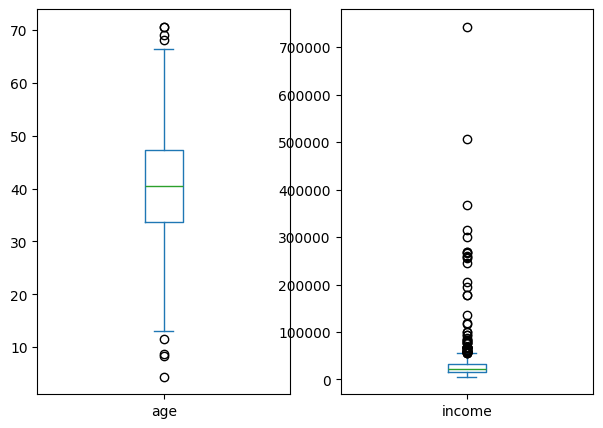

In [119]:
#Plot a box plot for income column to see if outliers were removed
df.plot(kind='box',subplots=True,layout=(1,4),figsize=(15,5))
plt.show()

In [120]:
df.shape

(1000, 4)

In [123]:
#Handling outliers using capping
#Capping outliers is useful because it prevents extreme values from skewing data analysis,ensuring more accurate and reliable results in calculations like averages or trends
income_cap=df['age'].quantile(0.95)
df['age']=df['age'].clip(upper=income_cap)
print("\nCapped Income:")
print(df[['age']].head())



Capped Income:
         age
0  40.912047
1  50.912827
2  50.912827
3  26.136505
4  17.035084


In [124]:
#Handling outliers
#Capping Income
income_cap=df['income'].quantile(0.95)
df['income']=df['income'].clip(upper=income_cap)
print("\nCapped Income:")
print(df[['income']].head())


Capped Income:
         income
0  12567.938216
1  19355.947903
2  25774.942685
3  24130.623657
4  34207.513831


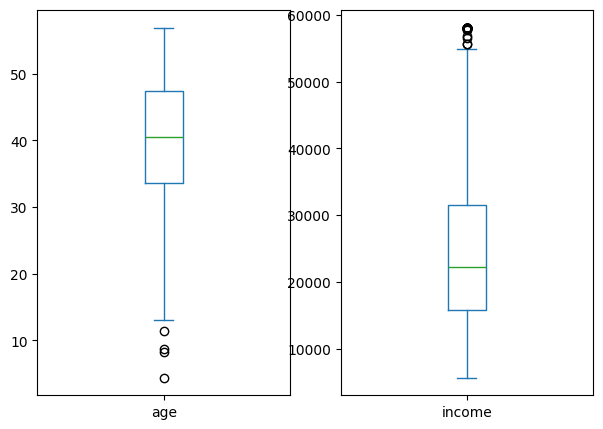

In [125]:
#Plot box plots after handling outliers
df.plot(kind='box',subplots=True,layout=(1,4),figsize=(15,5))
plt.show()

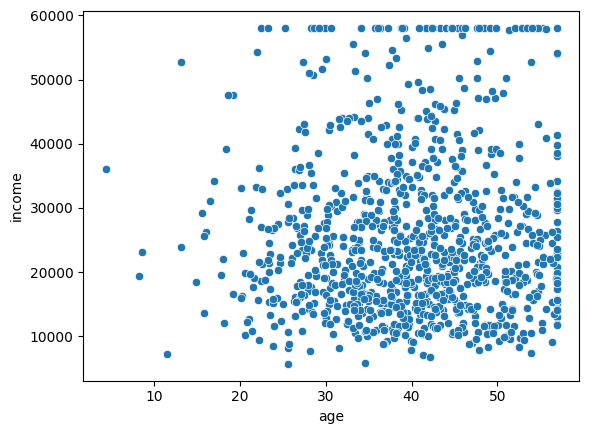

In [126]:
#Plot a visaulisation comparing income to age
sns.scatterplot(x='age',y='income',data=df)
plt.show()

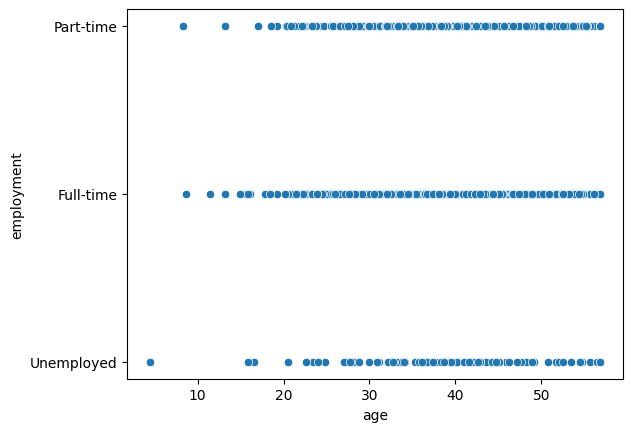

In [127]:
#Plot a visaulisation comparing age to employment
sns.scatterplot(x='age',y='employment',data=df)
plt.show()